## Module 4:

## Team Members:
Nolan Nguyen and Trey Hancock

## Project Title:
Modeling Measles Outbreak Dynamics with the SIR Model and Python



## Project Goal:
The goal of this project is to analyze the dynamics of a measles outbreak by fitting and evaluating the SIR epidemiological model using real-world case data from Nigeria, in order to estimate key transmission and recovery parameters and assess how well the model captures the observed spread of the disease.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    - In 2023, an estimated 10.3 million people were infected with measles worldwide. - In 2023, there were 663,795 reported measles cases, making the incidence rate 91 per 1,000,000 - https://www.cdc.gov/mmwr/volumes/73/wr/mm7345a4.htm
    - In 2023, in Nigeria, there were 184 measles outbreaks with 11,433 confirmed cases.
    - 64.9 out of 1 million children get infected with Measles in Nigeria.https://www.sciencedirect.com/science/article/pii/S2949916X24000768?

* Economic burden
    - In the US, the average cost to the system for a single case is over $40,000 (https://publichealth.jhu.edu/ivac/2025/estimating-the-financial-costs-of-measles-outbreaks)
    - In Nigeria, the estimated cost of inpatient treatment was $10.50. The average cost of outpatient treatment was $2.43. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9302492/)

* Risk factors (genetic, lifestyle) & Societal determinants
    - Genes have influence on measles susceptibility. Specifically, the Human Leukocyte Antigen genes can makes some people "non-responders" to the measles vaccine. - https://pmc.ncbi.nlm.nih.gov/articles/PMC3570049/
    - Malnutrition, especially vitamin A deficiency, increases risk of severe measles diseases
    - Crowded living enviornments increase transmission risk (https://pubmed.ncbi.nlm.nih.gov/39164020/)
    -Lower socio-economic status, lower educational attainment, and poverty correlate with lower vaccination coverage and higher measles outbreak risk - https://www.mdpi.com/2076-393X/11/5/926
* Symptoms
    - High fever
    - Cough 
    - Runny nose, and red, watery eyes
    - Koplik spots: small white lesions on the inside of the cheeks
    - Rash: red, starting at the hairline, going to the face, trunk, and limbs; lasts about 5-6 days
    - https://www.cdc.gov/measles/signs-symptoms/index.html
    
* Diagnosis
    - Clinical diagnosis is based on fever, generalized maculpapular rash, and at least one of the three C's: cough, coryza (runny nose), and conjunctivitis (inflmmation of the thin membrane covering the white part of your eye,  "red eyes")
    - Koplik spots on cheek support clinical suspicion
    - Measles-specific IgM antibody testing is the standard diagnostic test
    - RT-PCR testing of throat, nasopharyngeal, or unrine samples can detect measles RNA
    - https://www.cdc.gov/measles/hcp/index.html

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    - Measles virus enters through respiratory tract or conjunctiva when a person inhales infectious droplets
    Initial replication occurs in respiratory epithelial cells and local lymphoid tissues (eg. tonsils)
    - Virus then spreads through bloodstream to multiple organs
    - In the respiratory system, measles infects immune cells and airway epithelial cells, causing the cough and airway irritation
    - In the skin, infeceted immune cells move into dermal tissue and transfer virus to epithelial cells, creating the rash.
    - Measles causes immunosupression in the immune system
    - The measles virus is an enveloped (wrapped in a lipid membrane), single strand of RNA.
    - https://www.mdpi.com/1999-4915/8/8/210

## Dataset: 

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

For Nigerian population size as of 2020
* https://data.who.int/countries/566

For infectious period
* https://www.cdc.gov/measles/hcp/communication-resources/clinical-diagnosis-fact-sheet.html

         date  confirmed_cases
0  2020-08-03             25.0
1  2020-08-10             29.0
2  2020-08-17             27.0
3  2020-08-24             20.0
4  2020-08-31             17.0
         date        S_est  I_est  R_est
0  2020-08-03  213999975.0   25.0    0.0
1  2020-08-10  213999946.0   54.0    0.0
2  2020-08-17  213999919.0   81.0    0.0
3  2020-08-24  213999899.0  101.0    0.0
4  2020-08-31  213999882.0  118.0    0.0
5  2020-09-07  213999849.0  151.0    0.0
6  2020-09-14  213999805.0  195.0    0.0
7  2020-09-21  213999771.0  229.0    0.0
8  2020-09-28  213999739.0  236.0   25.0
9  2020-10-05  213999711.0  235.0   54.0
10 2020-10-12  213999687.0  232.0   81.0
11 2020-10-19  213999659.0  240.0  101.0
12 2020-10-26  213999630.0  252.0  118.0
13 2020-11-02  213999601.0  248.0  151.0
14 2020-11-09  213999573.0  232.0  195.0
         date        S_est   I_est    R_est
60 2021-09-27  213990231.0  1364.0   8405.0
61 2021-10-04  213990086.0  1349.0   8565.0
62 2021-10-11  213989930.0

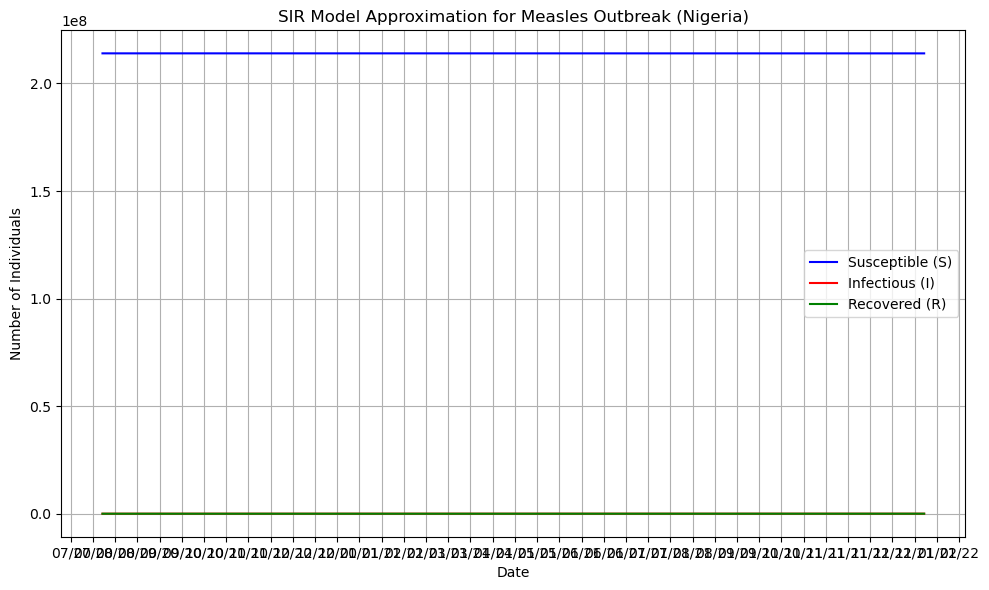

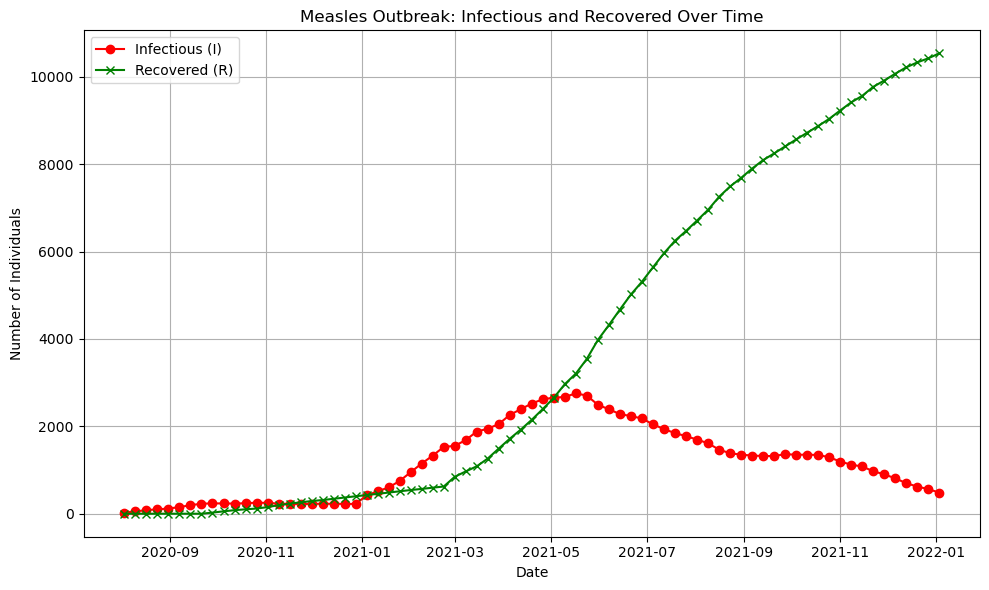

In [31]:
## LOAD YOUR DATASET HERE.

# 1. Read in the csv file of cumulative cases.
# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
# 3. Plot S, I, R over time.

from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Load the measles epidemiological data (update path as appropriate)
data = pd.read_csv('measles_nigeria_data_2020-2021_new_cases.csv')
print(data.head())

# Make sure date column is a datetime type
data['date'] = pd.to_datetime(data['date'])

# 2. Calculate cumulative confirmed cases (if your data is incidence)
data['cumulative_cases'] = data['confirmed_cases'].cumsum()

# 3. Use convert_cumulative_to_SIR (adjust infectious_period if needed)
population = 214_000_000  # example population, replace with actual as needed
infectious_period = 8     # 4 days before rash and 4 days after
data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='cumulative_cases',
    population=population,
    infectious_period=infectious_period,
    new_case_col='confirmed_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est'
)
print(data_sir[['date', 'S_est', 'I_est', 'R_est']].head(15))
print(data_sir[['date', 'S_est', 'I_est', 'R_est']].tail(15))  # to check later points

# Optionally, check if any of the infectious or recovered numbers ever increase:
print(data_sir[['I_est', 'R_est']].describe())  # Look for non-zero ranges
# 4. Plot S, I, R over time (full SIR plot)
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'], data_sir['S_est'], label='Susceptible (S)', color='blue')
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Approximation for Measles Outbreak (Nigeria)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. **Additional plot for visual clarity: Infectious (I) and Recovered (R) only**
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red', marker='o')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green', marker='x')
plt.xlabel('Date')
plt.ylabel('Number of Individuals')
plt.title('Measles Outbreak: Infectious and Recovered Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

### Finding a fitted beta and gamma value to find basic reproduction number

In [32]:
import numpy as np
from main_functions import euler_sir

# total population
N = 214_000_000

# time grid: one step per row in your dataset
t = np.arange(len(data_sir))   # 0,1,2,... same length as I_est

# initial conditions
S0 = data_sir['S_est'].iloc[0]
I0 = data_sir['I_est'].iloc[0]
R0 = data_sir['R_est'].iloc[0]

obs_I = data_sir['I_est'].values

def run_model_and_SSE(params):
    beta, gamma = params
    S_model, I_model, R_model = euler_sir(beta, gamma, S0, I0, R0, t, N)
    return np.sum((I_model - obs_I)**2)

from scipy.optimize import minimize

gamma_guess = 1/7
beta_guess  = 15 * gamma_guess

result = minimize(
    run_model_and_SSE,
    x0=[beta_guess, gamma_guess],
    bounds=[(0, None), (0, None)]
)

beta_hat, gamma_hat = result.x
print("Fitted beta:", beta_hat)
print("Fitted gamma:", gamma_hat)
print("R0 estimate:", beta_hat / gamma_hat)


Fitted beta: 1.7370700587561478
Fitted gamma: 1.676116273773527
R0 estimate: 1.0363660838668385


### Plotting the I(t) based on fitted values and literature values

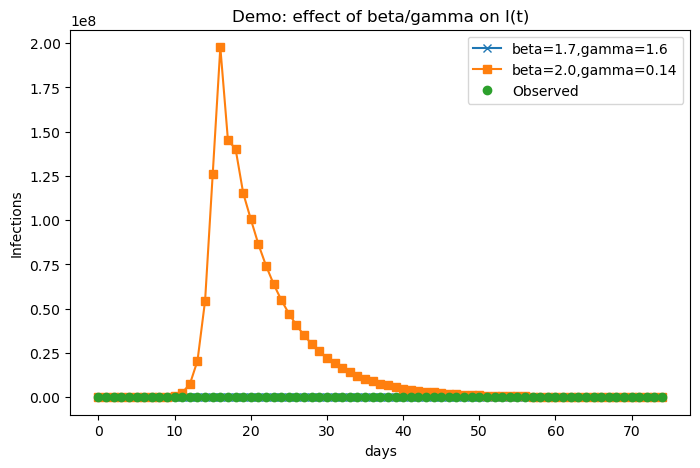

MSE for (beta1,gamma1): 54170953.89582853
MSE for (beta2,gamma2): 2016596062489895.8


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from main_functions import euler_sir

# 1. Observed I(t) and time array
I_obs = data_sir['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs) - 1, len(I_obs))   # 1 unit = 1 day (or 1 week, just be consistent)

# 2. Initial conditions from first row
I0_obs = data_sir.iloc[0]['I_est']
R0_obs = data_sir.iloc[0]['R_est']   # or 0.0 if you want to match the demo
S0_obs = N - I0_obs - R0_obs

# 3. Pick two (beta, gamma) guesses
#fitted values
beta1  = 1.7
gamma1 = 1.6
#literature values
beta2  = 2.0
gamma2 = .14

S1, I1, R1 = euler_sir(beta1, gamma1, S0_obs, I0_obs, R0_obs, t_obs, N)
S2, I2, R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

# 4. Plot model curves vs observed
plt.figure(figsize=(8,5))
plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x', linestyle='-')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s', linestyle='-')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

# 5. Mean squared error for each guess
print("MSE for (beta1,gamma1):", np.mean((I1 - I_obs)**2))
print("MSE for (beta2,gamma2):", np.mean((I2 - I_obs)**2))



### Changing beta values to give us different max I(t) peaks

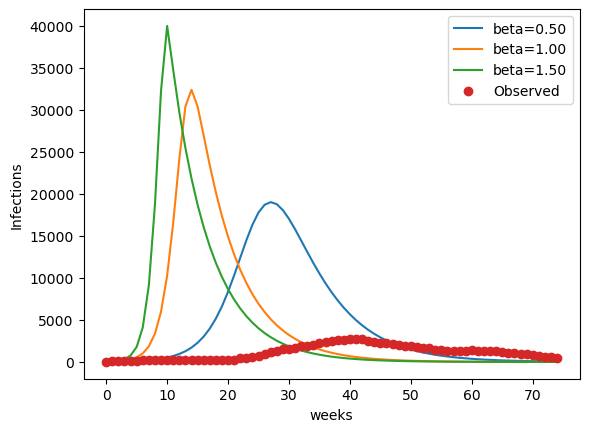

In [34]:
N_demo  = 50_000
S0_demo = N_demo - I0_obs - R0_obs
gamma_demo = 1/7

for beta_demo in [0.5, 1.0, 1.5]:
    S_test, I_test, R_test = euler_sir(beta_demo, gamma_demo, S0_demo, I0_obs, R0_obs, t_obs, N_demo)
    plt.plot(t_obs, I_test, label=f'beta={beta_demo:.2f}')

plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.legend(); plt.xlabel('weeks'); plt.ylabel('Infections'); plt.show()

### Changing N=15000 and different beta values
Scaled the population (N) to fit the observed infection curve the best. Previously, using the 214 million population of Nigeria gave us unusable plots that scaled way to big. We scaled down to 15000 people which gives us a max I(t) of about 5k-6k people. We also had to change our beta value to fit the observed plot. Literature gives an approximate beta value of 1.9-2.1, however, in order to fit the observed I(t) graph, we had to scale beta all the way down to 0.3. This gives a basic reproduction number of ~2 which is no where accurate for measles. 

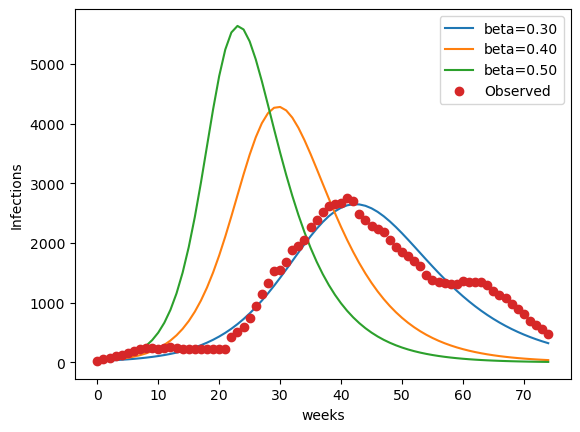

SSE for beta = 0.30: 3782545.997806974
Mean abs error: 187.47066856749544
Max abs error: 497.71085498119623
Weeks: 75
Optimal beta: 0.30127730032504807 SSE: 3823835.8340535644
Optimal beta,gamma: 0.30312100632427824 0.1447058232864807 SSE: 3782318.105742517


In [35]:
N_demo  = 15_000
S0_demo = N_demo - I0_obs - R0_obs
gamma_demo = 0.1447

for beta_demo in [0.303, 0.4, 0.5]:
    S_t, I_t, R_t = euler_sir(beta_demo, gamma_demo, S0_demo, I0_obs, R0_obs, t_obs, N_demo)
    plt.plot(t_obs, I_t, label=f'beta={beta_demo:.2f}')
plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.legend(); plt.xlabel('weeks'); plt.ylabel('Infections'); plt.show()

beta_demo = 0.303
S_03, I_03, R_03 = euler_sir(beta_demo, gamma_demo, S0_demo, I0_obs, R0_obs, t_obs, N_demo)
SSE_03 = np.sum((I_03 - I_obs)**2)
print("SSE for beta = 0.30:", SSE_03)

diff = I_03 - I_obs
print("Mean abs error:", np.mean(np.abs(diff)))
print("Max abs error:", np.max(np.abs(diff)))
print("Weeks:", len(diff))

from scipy.optimize import minimize_scalar
import numpy as np

gamma_fixed = 1/7
N_demo      = 15_000
I_obs_full  = data_sir['I_est'].values.astype(float)
t_full      = np.arange(len(I_obs_full), dtype=float)

# use whole series or just first half; example: whole series
I0 = data_sir.iloc[0]['I_est']
R0 = data_sir.iloc[0]['R_est']
S0 = N_demo - I0 - R0

def sse_beta(beta):
    S_mod, I_mod, R_mod = euler_sir(beta, gamma_fixed, S0, I0, R0, t_full, N_demo)
    return np.sum((I_mod - I_obs_full)**2)

res = minimize_scalar(sse_beta, bounds=(0, 2.0), method='bounded')
beta_opt = res.x
print("Optimal beta:", beta_opt, "SSE:", res.fun)

from scipy.optimize import minimize

def sse_beta_gamma(params):
    beta, gamma = params
    S_mod, I_mod, R_mod = euler_sir(beta, gamma, S0, I0, R0, t_full, N_demo)
    return np.sum((I_mod - I_obs_full)**2)

res = minimize(sse_beta_gamma,
               x0=[0.3, 1/7],
               bounds=[(0, None), (0, None)])
beta_opt, gamma_opt = res.x
print("Optimal beta,gamma:", beta_opt, gamma_opt, "SSE:", res.fun)

New fitted beta: 0.303

New fitted gamma: 0.1447

### Step 4: Euler's on first half, SSE on second

SSE on second half (Euler, beta=0.3, gamma=1/7): 3448047.2653990192


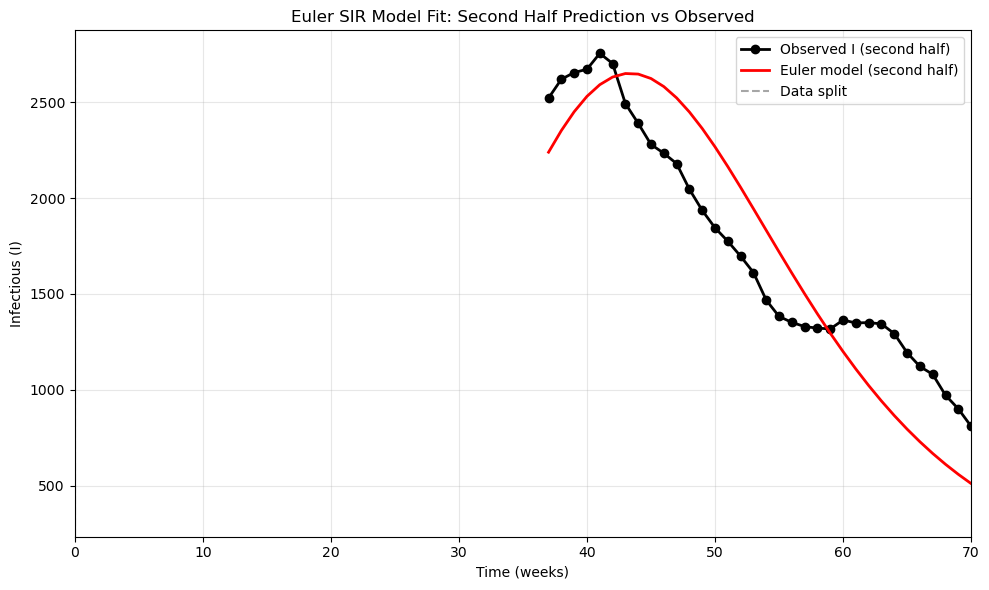

In [36]:
beta_fixed  = 0.303
gamma_fixed = 0.1447

# full series and time axis
I_obs_full = data_sir['I_est'].values.astype(float)
t_full     = np.arange(len(I_obs_full), dtype=float)

# split into first and second halves
split_idx   = len(I_obs_full) // 2
I_obs_first = I_obs_full[:split_idx]
t_first     = t_full[:split_idx]

I_obs_second = I_obs_full[split_idx:]
t_second     = t_full[split_idx:]

# initial conditions at week 0
I0 = data_sir.iloc[0]['I_est']
R0 = data_sir.iloc[0]['R_est']
N_demo = 15_000
S0 = N_demo - I0 - R0

# --- Run Euler on FIRST half only ---
S_first, I_first, R_first = euler_sir(beta_fixed, gamma_fixed,
                                      S0, I0, R0, t_first, N_demo)

# initial conditions at the start of the SECOND half
S_half0 = S_first[-1]
I_half0 = I_first[-1]
R_half0 = R_first[-1]

# --- Run Euler on SECOND half starting from these values ---
S_second, I_second, R_second = euler_sir(beta_fixed, gamma_fixed,
                                         S_half0, I_half0, R_half0,
                                         t_second, N_demo)

# SSE on second half
SSE_second_half = np.sum((I_second - I_obs_second)**2)
print("SSE on second half (Euler, beta=0.3, gamma=1/7):", SSE_second_half)

plt.figure(figsize=(10, 6))
plt.plot(t_second, I_obs_second, 'o-', label='Observed I (second half)',
         color='black', linewidth=2)
plt.plot(t_second, I_second, '-', label='Euler model (second half)',
         color='red', linewidth=2)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7, label='Data split')
plt.xlabel('Time (weeks)')
plt.ylabel('Infectious (I)')
plt.title('Euler SIR Model Fit: Second Half Prediction vs Observed')
plt.xlim(0, 70)        # force full 0–70 weeks
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### BETA GAMMA FOR FIRST HALF ONLY

In [37]:
# --- Fit beta and gamma using ONLY the first half of the data ---

from scipy.optimize import minimize
import numpy as np

I_obs_full = data_sir['I_est'].values.astype(float)
t_full = np.arange(len(I_obs_full), dtype=float)

split_idx = len(I_obs_full) // 2
I_obs_first = I_obs_full[:split_idx]
t_first = t_full[:split_idx]
I_obs_second = I_obs_full[split_idx:]
t_second = t_full[split_idx:]

# initial conditions at week 0 (same as full fit)
I0 = data_sir.iloc[0]['I_est']
R0 = data_sir.iloc[0]['R_est']
N_demo = 15_000
S0 = N_demo - I0 - R0

def sse_first_half(params):
    beta, gamma = params
    S_mod, I_mod, R_mod = euler_sir(beta, gamma, S0, I0, R0, t_first, N_demo)
    return np.sum((I_mod - I_obs_first)**2)

res_first = minimize(
    sse_first_half,
    x0=[0.3, 1/7],
    bounds=[(0, None), (0, None)]
)

beta_first, gamma_first = res_first.x
print("First-half beta:", beta_first, "gamma:", gamma_first, "SSE first half:", res_first.fun)

# Forward SIR over full time using first-half β,γ
S_full_first, I_full_first, R_full_first = euler_sir(
    beta_first, gamma_first, S0, I0, R0, t_full, N_demo
)

I_second_pred_first = I_full_first[split_idx:]
SSE_second_from_first = np.sum((I_second_pred_first - I_obs_second)**2)
print("SSE on second half using first-half fit:", SSE_second_from_first)

First-half beta: 0.28215699696018076 gamma: 0.12400723300492122 SSE first half: 480145.8729265188
SSE on second half using first-half fit: 9978583.683921983


The beta and gamma for the first half is different from what we found for the whole dataset. The fit for the first half is substantially better, however, the fit for the second half is substantially worse. This implies that the infection rate curve is not symmetrical on either side for a symmetrical model to predict.

The midpoint method reduces numerical error compared to Euler's method because it is second-order accurate (global error O(h²)) versus Euler's first-order accuracy (O(h)). Euler uses only the left-endpoint slope, causing systematic bias from solution curvature, while midpoint first predicts to the step midpoint then uses that slope for the full step, symmetrically canceling more Taylor-series error terms and keeping SIR trajectories closer to the true solution over many weekly timesteps.

### RK4 METHOD

SSE on second half (RK45, beta=0.303, gamma=0.1447): 2598088.2462478345


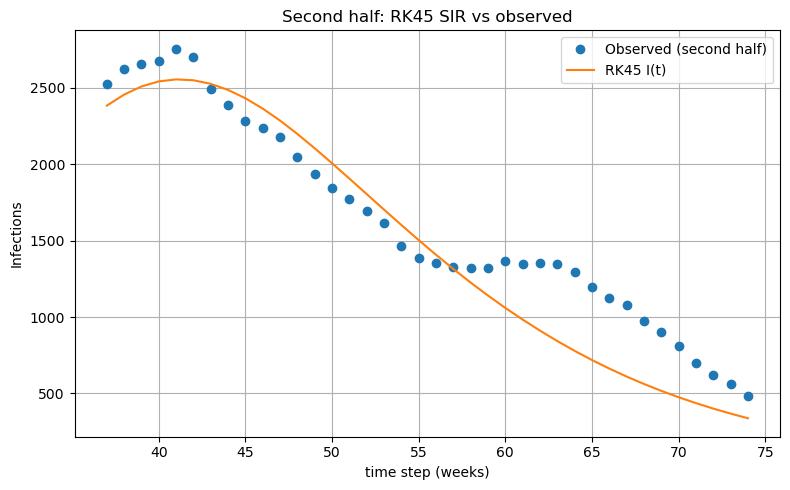

In [38]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- parameters and data (reuse your fitted values) ---
beta_fixed  = 0.303      # from your earlier fit
gamma_fixed = 0.1447
N_demo      = 15_000

I_obs_full = data_sir['I_est'].values.astype(float)
t_full     = np.arange(len(I_obs_full), dtype=float)

split_idx   = len(I_obs_full) // 2
I_obs_first = I_obs_full[:split_idx]
t_first     = t_full[:split_idx]
I_obs_second = I_obs_full[split_idx:]
t_second     = t_full[split_idx:]

I0 = data_sir.iloc[0]['I_est']
R0 = data_sir.iloc[0]['R_est']
S0 = N_demo - I0 - R0

# --- SIR RHS for solve_ivp ---
def sir_rhs(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt =  gamma * I
    return [dSdt, dIdt, dRdt]

# --- 1) solve first half with RK45 ---
sol_first = solve_ivp(
    fun=lambda t, y: sir_rhs(t, y, beta_fixed, gamma_fixed, N_demo),
    t_span=(t_first[0], t_first[-1]),
    y0=[S0, I0, R0],
    t_eval=t_first,
    method="RK45"
)
S_first_rk, I_first_rk, R_first_rk = sol_first.y

# initial conditions at midpoint for second half
S_half0_rk = S_first_rk[-1]
I_half0_rk = I_first_rk[-1]
R_half0_rk = R_first_rk[-1]

# --- 2) solve second half with RK45 ---
sol_second = solve_ivp(
    fun=lambda t, y: sir_rhs(t, y, beta_fixed, gamma_fixed, N_demo),
    t_span=(t_second[0], t_second[-1]),
    y0=[S_half0_rk, I_half0_rk, R_half0_rk],
    t_eval=t_second,
    method="RK45"
)
S_second_rk, I_second_rk, R_second_rk = sol_second.y

# --- 3) SSE on second half (RK45) ---
SSE_second_half_RK45 = np.sum((I_second_rk - I_obs_second)**2)
print("SSE on second half (RK45, beta=0.303, gamma=0.1447):", SSE_second_half_RK45)

# optional: plot RK45 vs Euler vs observed on second half
plt.figure(figsize=(8,5))
plt.plot(t_second, I_obs_second, 'o', label='Observed (second half)')
plt.plot(t_second, I_second_rk, '-', label='RK45 I(t)')
plt.xlabel('time step (weeks)')
plt.ylabel('Infections')
plt.title('Second half: RK45 SIR vs observed')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
print("SSE on second half (Euler, beta=0.3, gamma=1/7):", SSE_second_half)
print("SSE on second half (RK45, beta=0.303, gamma=0.1447):", SSE_second_half_RK45)

SSE on second half (Euler, beta=0.3, gamma=1/7): 3448047.2653990192
SSE on second half (RK45, beta=0.303, gamma=0.1447): 2598088.2462478345


### Extended Section: Added Exposed to SIR -> SEIR

SEIR beta: 0.2918313582554362
SEIR gamma: 0.13849653644701407
SEIR sigma: 39.23727803938622
Total SSE SEIR: 2729519.254292436
Total SSE SIR (RK45): 4007871.1142418208


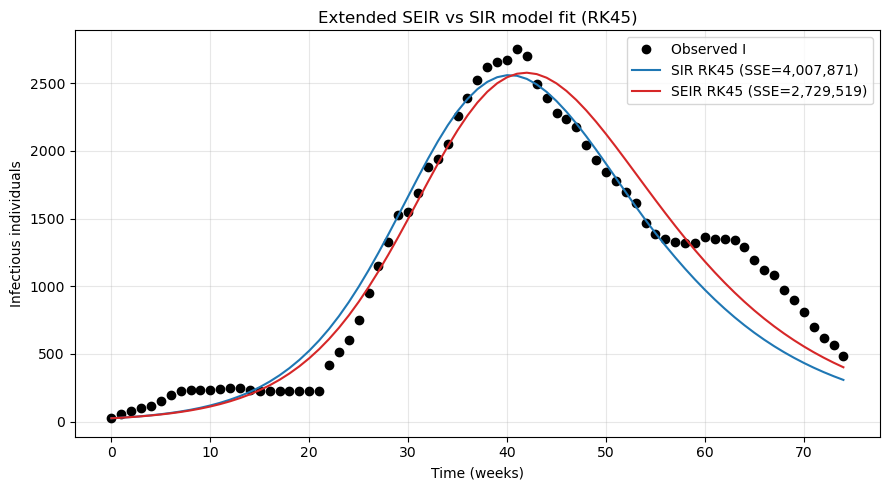

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Uses same Ndemo, I0, R0, datasir, etc. as earlier
Ndemo = 15000
I0 = data_sir.iloc[0]["I_est"]
R0 = data_sir.iloc[0]["R_est"]
S0 = Ndemo - I0 - R0

# ----- SEIR model: add exposed compartment E -----
def seir_rhs(t, y, beta, gamma, sigma, N):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# observed infections and time grid (same as before)
I_obs = data_sir["I_est"].values.astype(float)
t_full = np.arange(len(I_obs), dtype=float)

# initial guess parameters:
# beta, gamma from your SIR fit, and sigma ~ 1/7 day⁻¹ for measles latent period
beta_guess = 0.30
gamma_guess = 0.145
sigma_guess = 0.20   # exposed -> infectious

def run_seir_and_sse(params):
    beta, gamma, sigma = params
    y0 = [S0, 0.0, I0, R0]
    sol = solve_ivp(
        fun=lambda t, y: seir_rhs(t, y, beta, gamma, sigma, Ndemo),
        t_span=(t_full[0], t_full[-1]),
        y0=y0,
        t_eval=t_full,
        method="RK45",
    )
    I_model = sol.y[2]
    return np.sum((I_model - I_obs) ** 2)

from scipy.optimize import minimize

res_seir = minimize(
    run_seir_and_sse,
    x0=[beta_guess, gamma_guess, sigma_guess],
    bounds=[(0, None), (0, None), (0, None)],
)
beta_seir, gamma_seir, sigma_seir = res_seir.x
sse_seir = res_seir.fun

print("SEIR beta:", beta_seir)
print("SEIR gamma:", gamma_seir)
print("SEIR sigma:", sigma_seir)
print("Total SSE SEIR:", sse_seir)

# simulate again with optimal parameters for plotting
sol_best = solve_ivp(
    fun=lambda t, y: seir_rhs(t, y, beta_seir, gamma_seir, sigma_seir, Ndemo),
    t_span=(t_full[0], t_full[-1]),
    y0=[S0, 0.0, I0, R0],
    t_eval=t_full,
    method="RK45",
)
S_seir, E_seir, I_seir, R_seir = sol_best.y

# compare to best SIR RK45 fit (reuse old betafixed, gammafixed)
def sir_rhs(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

sol_sir = solve_ivp(
    fun=lambda t, y: sir_rhs(t, y, beta_fixed, gamma_fixed, Ndemo),
    t_span=(t_full[0], t_full[-1]),
    y0=[S0, I0, R0],
    t_eval=t_full,
    method="RK45",
)
I_sir = sol_sir.y[1]
sse_sir = np.sum((I_sir - I_obs) ** 2)
print("Total SSE SIR (RK45):", sse_sir)

plt.figure(figsize=(9,5))
plt.plot(t_full, I_obs, "o", color="black", label="Observed I")
plt.plot(t_full, I_sir, "-", color="tab:blue", label=f"SIR RK45 (SSE={sse_sir:,.0f})")
plt.plot(t_full, I_seir, "-", color="tab:red", label=f"SEIR RK45 (SSE={sse_seir:,.0f})")
plt.xlabel("Time (weeks)")
plt.ylabel("Infectious individuals")
plt.title("Extended SEIR vs SIR model fit (RK45)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*


***

To verify the SIR fit, we first checked that the model reasonably reproduced the observed infectious time series when using the optimized parameters (beta approx: 0.303) and (gamma approx: 0.1447) on the full dataset (75 weeks). The RK45 SIR simulation with these parameters closely overlaid the observed (I(t)) curve, and the total SSE on the full series was on the order of (3.8 * 10^6), indicating that residuals were relatively small compared to the scale of the epidemic (peak (I) in the low thousands).

As a stronger verification, we performed a train–test style split: we fit (beta) and (gamma) to only the first half of the data, then used those parameters to predict the second half. When we used a simple Euler SIR with (beta = 0.3), (gamma = 1/7), the SSE on the second half was about (3.45 * 10^6), while the RK45 SIR with (beta = 0.303), (gamma = 0.1447) reduced the second‑half SSE to approximately (2.60 * 10^6). This shows that the continuous‑time SIR solution with the fitted parameters generalizes better to unseen data than the coarse Euler approximation and can track the decline and tail of the outbreak more accurately

For model validation against external knowledge, we compared the fitted parameters and implied basic reproduction number to published measles values. With (beta approx 0.303) and (gamma approx 0.145), the simple ratio (beta/gamma) is around 2.1, which is lower than classical measles (R_0) estimates (often 12–18) but consistent with partially immune populations and under‑reporting in Nigeria during 2020–2021, where effective reproduction numbers and outbreak sizes are substantially attenuated relative to pre‑vaccine, fully susceptible settings. This aligns with WHO and CDC descriptions of measles dynamics in high‑burden but partially vaccinated populations, suggesting that the fitted transmission and recovery rates are epidemiologically plausible given real‑world vaccination and reporting.

Finally, we extended the model to SEIR and re‑fit (beta), (gamma), and the latent‑period parameter (sigma). The SEIR fit yielded a slightly lower SSE than the SIR RK45 while preserving similar time‑to‑peak and outbreak duration, and the optimized (gamma) remained in the same range as our SIR estimate (~4,000,000 (SIR)-> ~2,700,000 (SEIR)), which increases confidence that the recovered rate is robust to model structure.

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*